<a href="https://colab.research.google.com/github/quangtu1042001/CNN/blob/main/validate_cnn_anti_spoofing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# make dataset

In [ ]:
!cp /content/drive/MyDrive/'anti spoofing'.v1i.coco.zip /content

In [ ]:
!unzip 'anti spoofing'.v1i.coco.zip

Archive:  anti spoofing.v1i.coco.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/-_27_jpg.rf.3e25bdbe8316818221f9a0f63985f760.jpg  
 extracting: test/0005_jpg.rf.eabd2474f114120d0b431e5ddccef9b2.jpg  
 extracting: test/0012_jpg.rf.5b89ac27acf5c97900aa6e2f909f4dbc.jpg  
 extracting: test/001556_jpg.rf.c27946f57846749526ec65b8e4f500f1.jpg  
 extracting: test/002776_jpg.rf.f0defdfe8f83f3477853d59589658357.jpg  
 extracting: test/0028_jpg.rf.bd39b618b63a198fa01b8e9349c178a5.jpg  
 extracting: test/003873_jpg.rf.e4e085c92c3fba649edfd92740651553.jpg  
 extracting: test/0061_jpg.rf.2795cd48e9b23d752404f6b0526629d2.jpg  
 extracting: test/007188_jpg.rf.80a75cc26a84f29bd97482cfa061f116.jpg  
 extracting: test/008113_jpg.rf.b32519720b95fa3b372aeb6504f7e14a.jpg  
 extracting: test/0091_jpg.rf.a6691499d8206bede484e2f0a36306c6.jpg  
 extracting: test/012405_jpg.rf.49cb2d9b6daccdcbdb868354817991b8.jpg  
 extracting: test/018514_jpg

In [ ]:
testJsonPath = '/content/test/_annotations.coco.json'
trainJsonPath = '/content/train/_annotations.coco.json'
validJsonPath = '/content/valid/_annotations.coco.json'

In [ ]:
import json

with open(testJsonPath, 'r') as f:
  testDataJson = json.load(f)

with open(trainJsonPath, 'r') as f:
  trainDataJson = json.load(f)

with open(validJsonPath, 'r') as f:
  validDataJson = json.load(f)


In [ ]:
print(testDataJson['images'][0])
print(testDataJson['annotations'][0])

{'id': 0, 'license': 1, 'file_name': 'WIN_20220208_16_06_16_Pro_jpg.rf.07bb3065aa8b289ae07eb601329fd548.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-12-24T15:52:47+00:00'}
{'id': 0, 'image_id': 0, 'category_id': 1, 'bbox': [440, 140, 199, 313], 'area': 62287, 'segmentation': [], 'iscrowd': 0}


In [ ]:
def findImage(id,data):
  for x in data:
    if x['id'] == id:
      return x['file_name']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

def showImage(image_paths,list_bbox):
  # Khởi tạo subplot với 2 hàng và 3 cột
  fig, axs = plt.subplots(2, 3, figsize=(10, 7))

  # Duyệt qua từng hình ảnh và hiển thị nó trên subplot tương ứng
  for i in range(2):
      for j in range(3):
          # Đọc hình ảnh sử dụng thư viện Matplotlib
          img = cv2.imread(image_paths[i * 3 + j])
          bbox = list_bbox[i * 3 + j]

          x_min, y_min, width, height = map(int, bbox)
          x_max, y_max = x_min + width, y_min + height

          cropped_img = img[y_min:y_max, x_min:x_max]
          # Hiển thị hình ảnh trên subplot
          axs[i, j].imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
          axs[i, j].axis('off')  # Tắt trục x và y

  # Hiển thị các subplot
  plt.show()

------------------ class 1 : phone


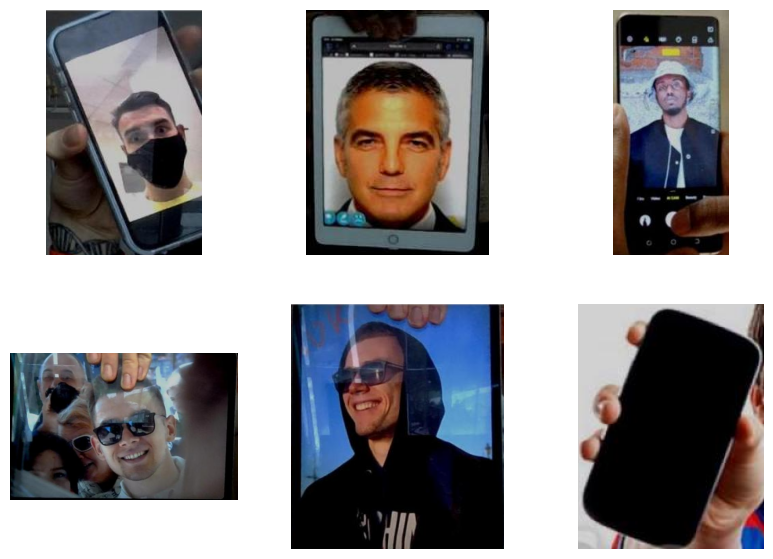

------------------ class 2 : face


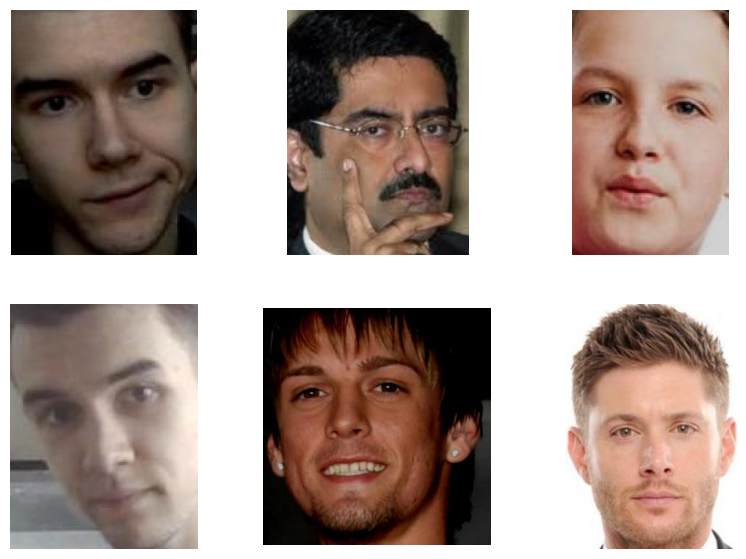

------------------ class 3 : mask


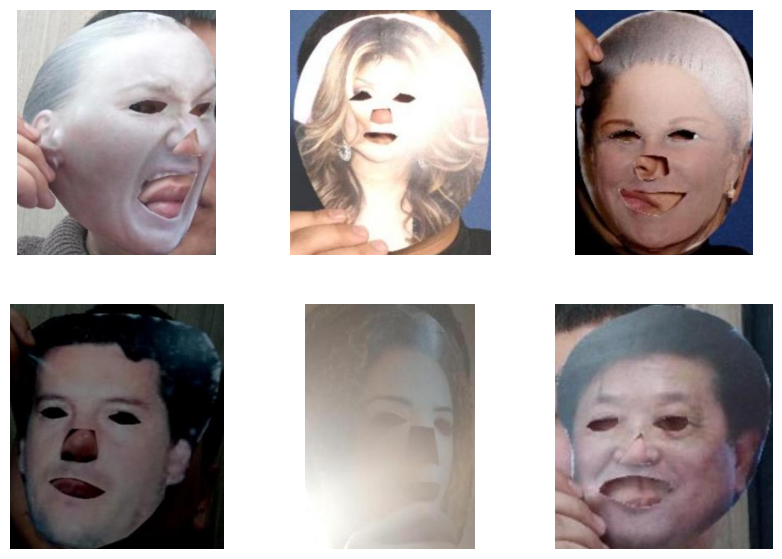

------------------ class 4 : photo


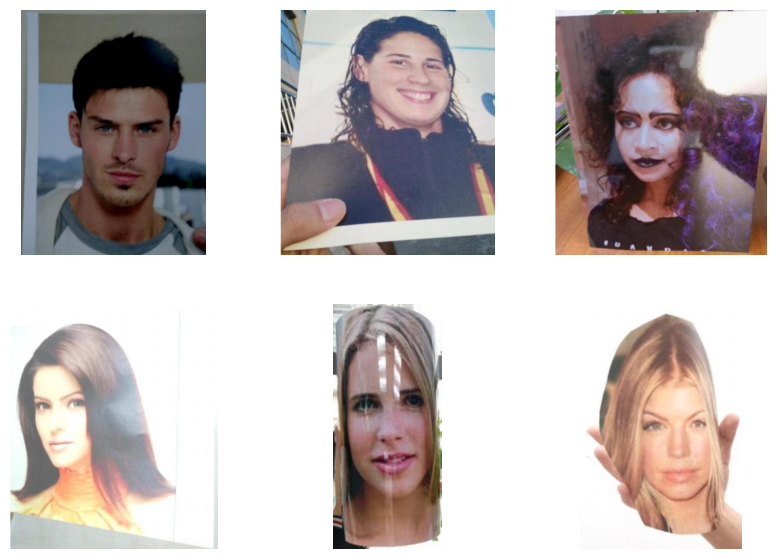

In [ ]:
classes = [1,2,3,4]
maxDisplay = 6

print('------------------ class 1 : phone')
result = []
list_bbox = []
for x in testDataJson['annotations']:
  if(x['category_id'] == 1):
    result.append('/content/test/' + findImage(x['image_id'],testDataJson['images']))
    list_bbox.append(x['bbox'])

    if(len(result) == 6):
      break

showImage(result,list_bbox)

print('------------------ class 2 : face')
result = []
list_bbox = []
for x in testDataJson['annotations']:
  if(x['category_id'] == 2):
    result.append('/content/test/' + findImage(x['image_id'],testDataJson['images']))
    list_bbox.append(x['bbox'])

    if(len(result) == 6):
      break

showImage(result,list_bbox)

print('------------------ class 3 : mask')
result = []
list_bbox = []
for x in testDataJson['annotations'][10:]:
  if(x['category_id'] == 3):
    result.append('/content/test/' + findImage(x['image_id'],testDataJson['images']))
    list_bbox.append(x['bbox'])

    if(len(result) == 6):
      break

showImage(result,list_bbox)

print('------------------ class 4 : photo')
result = []
list_bbox = []
for x in testDataJson['annotations']:
  if(x['category_id'] == 4):
    result.append('/content/test/' + findImage(x['image_id'],testDataJson['images']))
    list_bbox.append(x['bbox'])

    if(len(result) == 6):
      break

showImage(result,list_bbox)



In [ ]:
!mkdir -p dataset/train/photo
!mkdir -p dataset/train/face
!mkdir -p dataset/train/mask
!mkdir -p dataset/train/phone

!mkdir -p dataset/test/photo
!mkdir -p dataset/test/face
!mkdir -p dataset/test/mask
!mkdir -p dataset/test/phone

!mkdir -p dataset/valid/photo
!mkdir -p dataset/valid/face
!mkdir -p dataset/valid/mask
!mkdir -p dataset/valid/phone

In [ ]:
def cropImage(image_path, bbox):
  img = cv2.imread(image_path)

  x_min, y_min, width, height = map(int, bbox)
  x_max, y_max = x_min + width, y_min + height

  cropped_img = img[y_min:y_max, x_min:x_max]

  return cropped_img

def makeNewDataSet(data,output,dirFolder):
  for x in data['annotations']:
    imageName = findImage(x['image_id'],data['images'])
    image = cropImage(dirFolder + imageName, x['bbox'])

    if(x['category_id'] == 1):
      dir = 'phone/'

      cv2.imwrite(output + dir + imageName, image)
    if(x['category_id'] == 2):
      dir = 'face/'

      cv2.imwrite(output + dir + imageName, image)
    if(x['category_id'] == 3):
      dir = 'mask/'

      cv2.imwrite(output + dir + imageName, image)
    if(x['category_id'] == 4):
      dir = 'photo/'

      cv2.imwrite(output + dir + imageName, image)

In [ ]:
import os

output = '/content/dataset/test/'

dirFolder = '/content/test/'
makeNewDataSet(testDataJson,output,dirFolder)

output = '/content/dataset/train/'

dirFolder = '/content/train/'
makeNewDataSet(trainDataJson,output,dirFolder)

output = '/content/dataset/valid/'

dirFolder = '/content/valid/'
makeNewDataSet(validDataJson,output,dirFolder)

In [ ]:
!zip -r /content/dataset_antispoofing.zip /content/dataset

In [ ]:
!cp /content/dataset_antispoofing.zip /content/drive/MyDrive

# train

In [ ]:
!cp /content/drive/MyDrive/dataset_antispoofing.zip /content

In [ ]:
!unzip dataset_antispoofing.zip

Found 835 images belonging to 4 classes.
Class names: ['face', 'mask', 'phone', 'photo']
Number of classes: 4


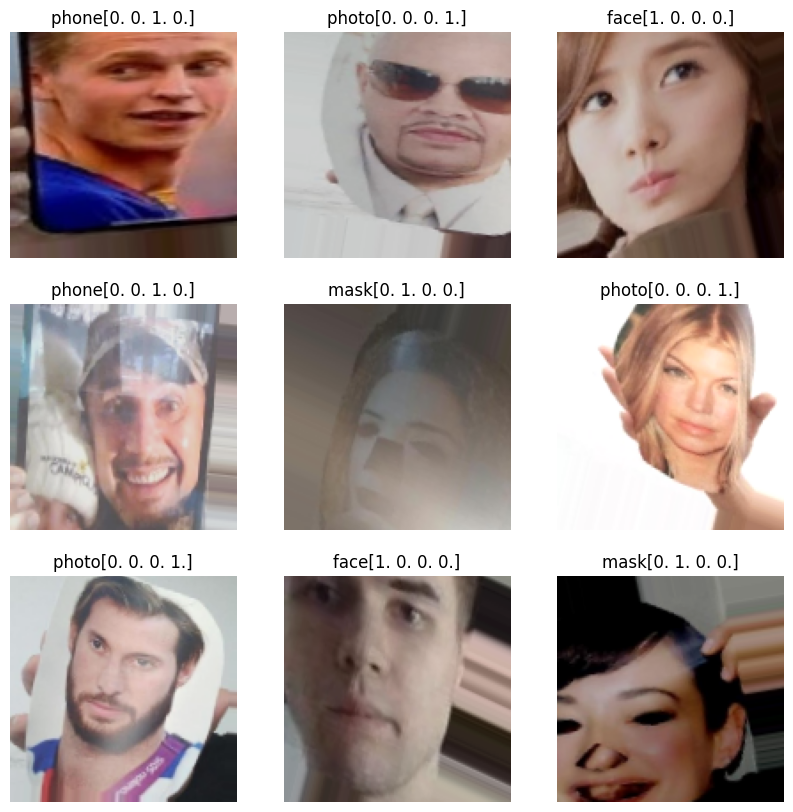

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn đến thư mục chứa dữ liệu huấn luyện
train_data_dir = "/content/content/dataset/train"

# Kích thước ảnh đầu vào
img_size = (128, 128)

# Tạo generator dữ liệu
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

batch_size = 32

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Dùng 'categorical' vì có nhiều hơn 2 lớp
)

# Hiển thị thông tin về các lớp được tìm thấy trong dữ liệu
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)
print("Class names:", class_names)
print("Number of classes:", num_classes)

# Kiểm tra và hiển thị một vài ảnh từ bộ dữ liệu
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(min(9, batch_size)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[np.argmax(sample_labels[i])] + str(sample_labels[i]))
    plt.axis("off")
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from keras import layers, models
from keras.models import Model
from keras.layers import Flatten, Dense, GlobalAveragePooling2D, Input
from sklearn.model_selection import train_test_split
from keras.applications import VGG16, VGG19
from keras import optimizers

model_vgg19_conv = VGG19(weights='imagenet', include_top=False)
model_vgg19_conv.summary()

input = Input(shape=(128,128,3),name = 'image_input')

for layer in model_vgg19_conv.layers:
    layer.trainable = False

#Use the generated model
output_vgg19_conv = model_vgg19_conv(input)

#Add the fully-connected layers
x = Flatten(name='flatten')(output_vgg19_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)

model = Model(inputs=input, outputs=x)
model.compile(optimizer=optimizers.Nadam(learning_rate=1e-4), loss='binary_crossentropy',metrics='accuracy')
#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
# Train the model
model.fit(train_generator, epochs=20, validation_steps=5)

27/27 [==============================] - 6s 203ms/step - loss: 0.0702 - accuracy: 0.9533
Epoch 14/20
27/27 [==============================] - 7s 277ms/step - loss: 0.0530 - accuracy: 0.9677
Epoch 15/20
27/27 [==============================] - 7s 259ms/step - loss: 0.0466 - accuracy: 0.9725
Epoch 16/20
27/27 [==============================] - 7s 270ms/step - loss: 0.0463 - accuracy: 0.9701
Epoch 17/20
27/27 [==============================] - 6s 203ms/step - loss: 0.0425 - accuracy: 0.9713
Epoch 18/20
27/27 [==============================] - 7s 277ms/step - loss: 0.0477 - accuracy: 0.9760
Epoch 19/20
27/27 [==============================] - 6s 199ms/step - loss: 0.0393 - accuracy: 0.9725
Epoch 20/20
27/27 [==============================] - 6s 218ms/step - loss: 0.0423 - accuracy: 0.9772


In [ ]:
model.save("/content/drive/MyDrive/vgg19_new_dataset_adam_antiSpoofing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## validation

In [ ]:
model.load_weights('/content/drive/MyDrive/vgg19_new_dataset_adam_antiSpoofing.h5')

In [ ]:
!cp /content/drive/MyDrive/dataset_antispoofing.zip /content
!unzip dataset_antispoofing.zip

Found 133 images belonging to 4 classes.
Class names: ['face', 'mask', 'phone', 'photo']
Number of classes: 4


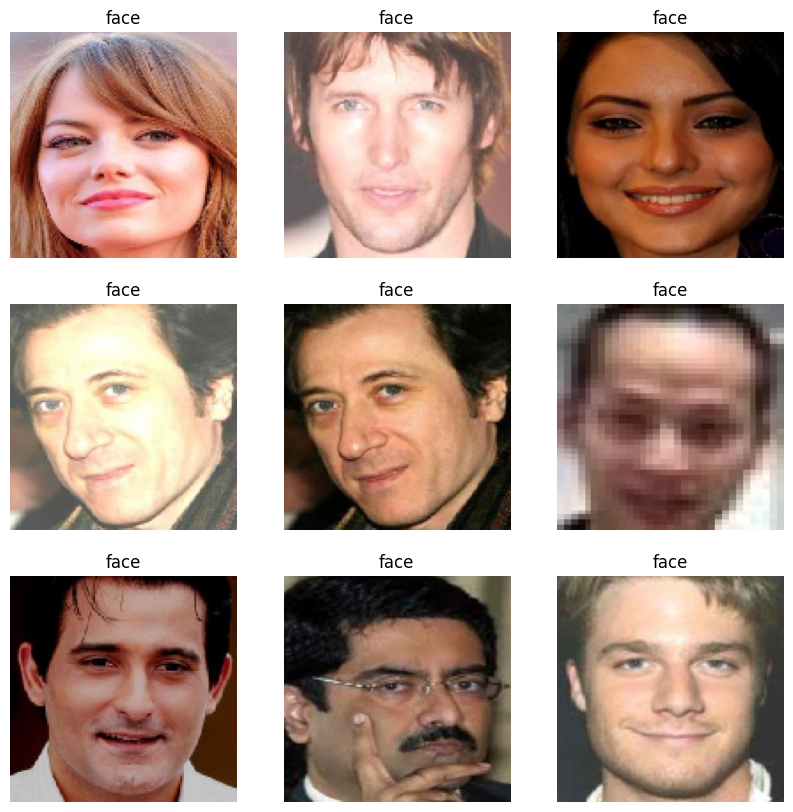

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn đến thư mục chứa dữ liệu huấn luyện
train_data_dir = "/content/content/dataset/test"

# Kích thước ảnh đầu vào
img_size = (128, 128)

# Tạo generator dữ liệu
datagen = ImageDataGenerator(rescale=1./255)  # Chia tỷ lệ giá trị pixel về khoảng [0, 1]
batch_size = 16

test_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Dùng 'categorical' nếu bạn có nhiều hơn 2 lớp
    shuffle=False
)

# Hiển thị thông tin về các lớp được tìm thấy trong dữ liệu
class_names = list(test_generator.class_indices.keys())
num_classes = len(class_names)
print("Class names:", class_names)
print("Number of classes:", num_classes)

# Kiểm tra và hiển thị một vài ảnh từ bộ dữ liệu
sample_images, sample_labels = next(test_generator)
plt.figure(figsize=(10, 10))
for i in range(min(9, batch_size)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[np.argmax(sample_labels[i])])
    plt.axis("off")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 [==============================] - 7s 282ms/step - loss: 0.0710 - accuracy: 0.9624
Test Loss: 0.0709591880440712
Test Accuracy: 0.9624060392379761


<ipython-input-14-c0fa99a1a475>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


9/9 [==============================] - 3s 38ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.95      1.00      0.98        21
           2       0.95      1.00      0.98        40
           3       0.97      0.92      0.94        37

    accuracy                           0.96       133
   macro avg       0.96      0.97      0.96       133
weighted avg       0.96      0.96      0.96       133

--------------------------


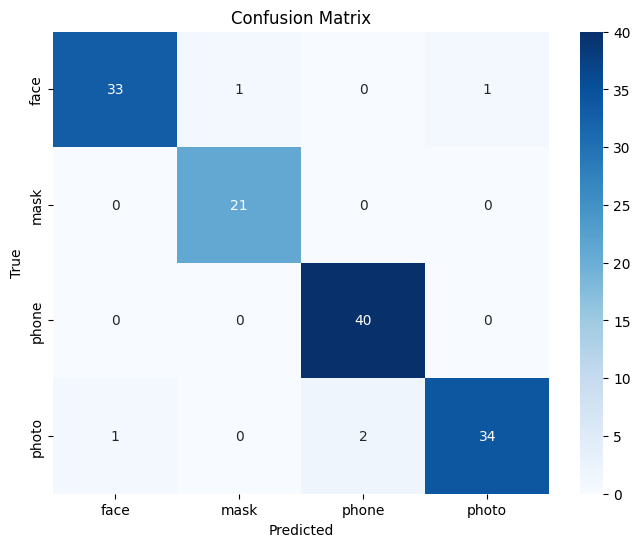

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print(class_report)
print('--------------------------')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()